
# 🧠 Hipotez Nedir? Bilimsel İddiaların Temeli

## Giriş: Her Büyük Fikir Bir Varsayım Üzerine Kurulur

Diyelim ki yeni bir ürün tasarladın.  
Kampanya başladı → satışlar arttı.  
Ama bu artış gerçekten kampanyadan mı kaynaklandı?

> “Hipotez, doğruluğu henüz kanıtlanmamış iddiadır. 

## 🔍 Hipotez Nedir?

Bilimsel araştırmanın en başlangıcıdır.  
Test edilebilir bir tahmin veya varsayım olarak tanımlanır.

📌 Özellikleri:
- **Test edilebilir**
- **Net ve kesin**
- **Değişkenler arasında ilişki kurmuş**
- **İlgili araştırma sorusuyla bağlantılı**

## 📋 Hipotez Türleri: Kim Ne İçin Test Ediyor?

### 1. **Basit vs Karmaşık Hipotez**

| Tür | Açıklama | Örnek |
|------|----------|--------|
| **Basit** | İki değişken arası ilişki | "Egzersiz kalp sağlığını iyileştirir" |
| **Karmaşık** | Çoklu değişken ilişkisi | "Egzersiz + beslenme → sağlık + zeka"


### 2. **Sıfır (H₀) vs Alternatif (H₁)**

| Tür | Açıklama | Örnek |
|------|----------|--------|
| **H₀ (Null Hypothesis)** | Değişkenlerde fark yok | "Uyku süresi sınav performansını etkilemez" |
| **H₁ (Alternative Hypothesis)** | Değişkenlerde fark var | "Uyku süresi sınav puanını artırır" |


### 3. **Tek Yönlü vs Çift Yönlü**

| Tür | Açıklama | Örnek |
|------|----------|--------|
| **Tek yönlü (One-tailed)** | Yönü belli olan hipotez | "Fiyat düşünce dönüşüm oranı artar" |
| **Çift yönlü (Two-tailed)** | Sadece fark var, yön önemli değil | "Fiyat değişti, dönüşüm oranı değişti" |

📌 Tek yönlü test → daha güçlü  
Çift yönlü test → daha genel  


## 🤔 Hangi Hipotez Nasıl Kurulur?

| Soru | H₀ | H₁ |
|-------|-----|-----|
| Ürün fiyatı düşünce satış artar mı? | Fiyat değişince satış değişmez | Fiyat düşünce satış artar |
| Yeni buton daha fazla tıklanıyor mu? | Tıklama aynı | Tıklama farklı |
| Yeni ilacın etkisi var mı? | Etki yok | Etki var |
| Uyku süresi öğrenmeye etki eder mi? | Etki yok | Etki var |

📌 H0 hep fark yok demek → H1 ise fark var demek!

## 🧪 Gerçek Hayatta Nasıl Test Edilir?

### Senaryo: Erkeklerin Ortalama Boyu 172 cm midir?

#### Veri:

📊 HİPOTEZ TESTİ SONUÇLARI (α=0.05)
Örneklem Ortalaması: 173.48 cm
Örneklem Standart Sapması: 4.54 cm
Örneklem Büyüklüğü: 100
Z Skoru: 3.2610
p-değeri: 0.001110
Test Gücü: 99.3%

💡 YORUM:
✅ H₀ reddedildi (p < 0.05) → Gerçek ortalama 172 cm'den farklı
   Gözlemler, ortalamanın 172 cm'den YÜKSEK olduğunu gösteriyor
---->✅ H₀ reddedildi → ortalama 172 cm değil


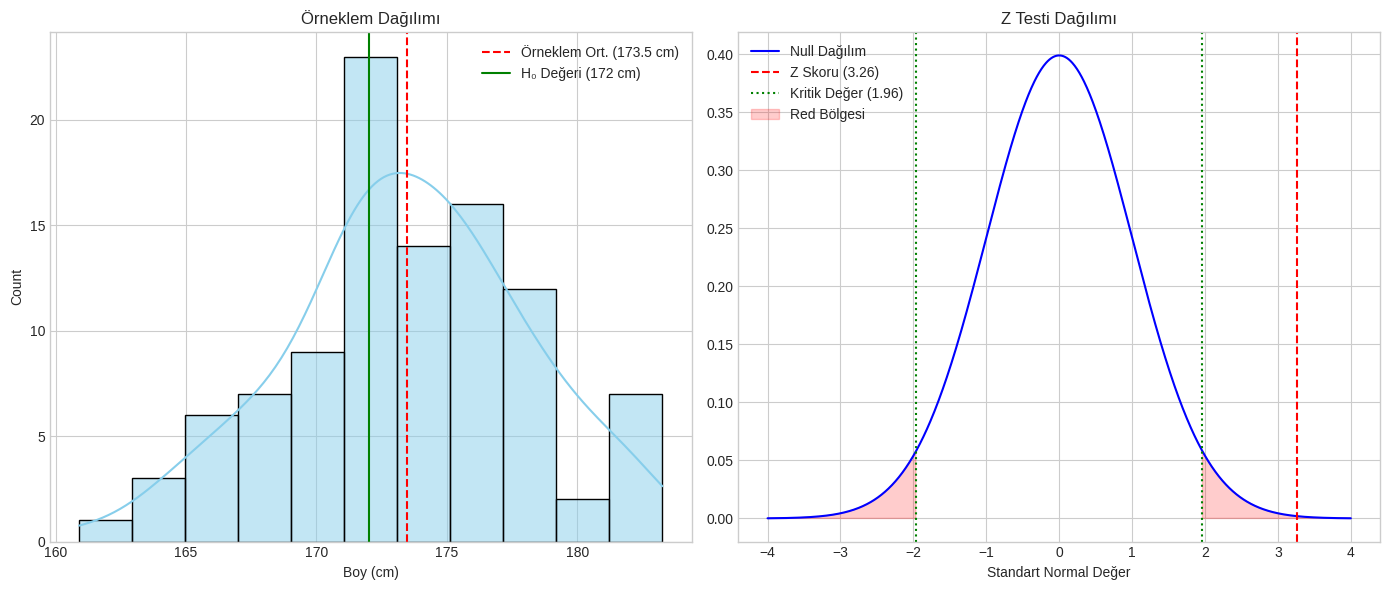


🔍 EK ANALİZLER:
- %95 Güven Aralığı: (172.59, 174.37)
- Etki Büyüklüğü (Cohen's d): 0.33


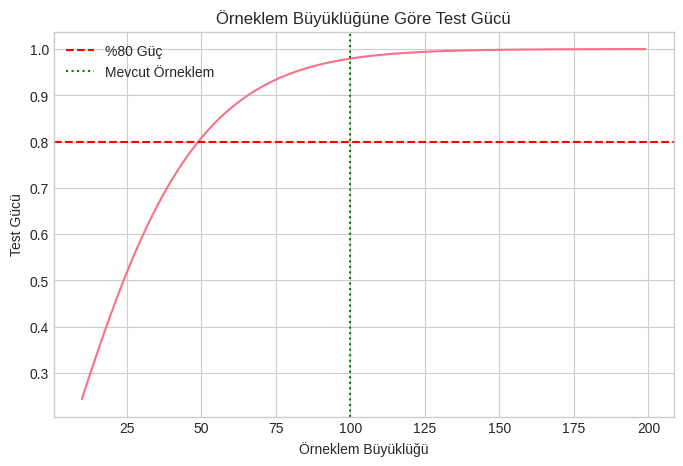

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Profesyonel görselleştirme ayarları
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

def hipotez_testi_analizi(mu_0=172, gercek_ortalama=174, std=5, n=100, alpha=0.05):
    """
    Kapsamlı hipotez testi analizi ve görselleştirme
    
    Parametreler:
        mu_0 (float): Null hipotez değeri
        gercek_ortalama (float): Popülasyon gerçek ortalaması (simülasyon için)
        std (float): Standart sapma
        n (int): Örneklem büyüklüğü
        alpha (float): Anlamlılık düzeyi
    """
    # Veri üretimi
    np.random.seed(42)
    orneklem = np.random.normal(loc=gercek_ortalama, scale=std, size=n)
    orneklem_ort = np.mean(orneklem)
    orneklem_std = np.std(orneklem, ddof=1)
    
    # Z-testi hesaplamaları
    z_skor = (orneklem_ort - mu_0) / (orneklem_std/np.sqrt(n))
    p_deger = 2 * (1 - stats.norm.cdf(abs(z_skor)))
    
    # Güç analizi
    guc = stats.norm.sf(stats.norm.ppf(1-alpha/2) - 
                 (gercek_ortalama-mu_0)/(orneklem_std/np.sqrt(n))) + \
          stats.norm.cdf(-stats.norm.ppf(1-alpha/2) - 
                 (gercek_ortalama-mu_0)/(orneklem_std/np.sqrt(n)))
    
    # Sonuç raporu
    print(f"📊 HİPOTEZ TESTİ SONUÇLARI (α={alpha})")
    print("="*50)
    print(f"Örneklem Ortalaması: {orneklem_ort:.2f} cm")
    print(f"Örneklem Standart Sapması: {orneklem_std:.2f} cm")
    print(f"Örneklem Büyüklüğü: {n}")
    print(f"Z Skoru: {z_skor:.4f}")
    print(f"p-değeri: {p_deger:.6f}")
    print(f"Test Gücü: {guc*100:.1f}%")
    print("\n💡 YORUM:")
    
    if p_deger < alpha:
        print(f"✅ H₀ reddedildi (p < {alpha}) → Gerçek ortalama {mu_0} cm'den farklı")
        if orneklem_ort > mu_0:
            print(f"   Gözlemler, ortalamanın {mu_0} cm'den YÜKSEK olduğunu gösteriyor")
        else:
            print(f"   Gözlemler, ortalamanın {mu_0} cm'den DÜŞÜK olduğunu gösteriyor")
    else:
        print(f"❌ H₀ reddedilemedi (p ≥ {alpha}) → Ortalamanın {mu_0} cm olduğuna dair yeterli kanıt yok")


    if p_deger < 0.05:
        print("---->✅ H₀ reddedildi → ortalama 172 cm değil")
    else:
        print("❌ H₀ reddedilemedi → ortalama hala 172 cm olabilir")
    
    # Görselleştirme
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Örneklem dağılımı
    sns.histplot(orneklem, kde=True, ax=ax1, color='skyblue')
    ax1.axvline(orneklem_ort, color='red', linestyle='--', label=f'Örneklem Ort. ({orneklem_ort:.1f} cm)')
    ax1.axvline(mu_0, color='green', linestyle='-', label=f'H₀ Değeri ({mu_0} cm)')
    ax1.set_title('Örneklem Dağılımı')
    ax1.set_xlabel('Boy (cm)')
    ax1.legend()
    
    # Test istatistiği dağılımı
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)
    kritik_deger = stats.norm.ppf(1-alpha/2)
    
    ax2.plot(x, y, 'b-', label='Null Dağılım')
    ax2.axvline(z_skor, color='r', linestyle='--', label=f'Z Skoru ({z_skor:.2f})')
    ax2.axvline(kritik_deger, color='g', linestyle=':', label=f'Kritik Değer ({kritik_deger:.2f})')
    ax2.axvline(-kritik_deger, color='g', linestyle=':')
    ax2.fill_between(x, y, where=(x>=kritik_deger)|(x<=-kritik_deger), color='red', alpha=0.2, label='Red Bölgesi')
    ax2.set_title('Z Testi Dağılımı')
    ax2.set_xlabel('Standart Normal Değer')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Ek bilgiler
    print("\n🔍 EK ANALİZLER:")
    print(f"- %95 Güven Aralığı: ({orneklem_ort - 1.96*orneklem_std/np.sqrt(n):.2f}, {orneklem_ort + 1.96*orneklem_std/np.sqrt(n):.2f})")
    print(f"- Etki Büyüklüğü (Cohen's d): {(orneklem_ort - mu_0)/orneklem_std:.2f}")
    
    # Güç analizi grafiği
    if p_deger < alpha:
        plt.figure(figsize=(8, 5))
        n_guc = np.arange(10, 200)
        guc_degerleri = 1 - stats.norm.cdf(stats.norm.ppf(1-alpha/2) - 
                                          (gercek_ortalama-mu_0)/(std/np.sqrt(n_guc)))
        plt.plot(n_guc, guc_degerleri)
        plt.axhline(0.8, color='r', linestyle='--', label='%80 Güç')
        plt.axvline(n, color='g', linestyle=':', label='Mevcut Örneklem')
        plt.title('Örneklem Büyüklüğüne Göre Test Gücü')
        plt.xlabel('Örneklem Büyüklüğü')
        plt.ylabel('Test Gücü')
        plt.legend()
        plt.grid(True)
        plt.show()

# Analizi çalıştır
hipotez_testi_analizi(mu_0=172, gercek_ortalama=174, std=5, n=100)

📈 Görselleştirme: Z Skoru Nerede?

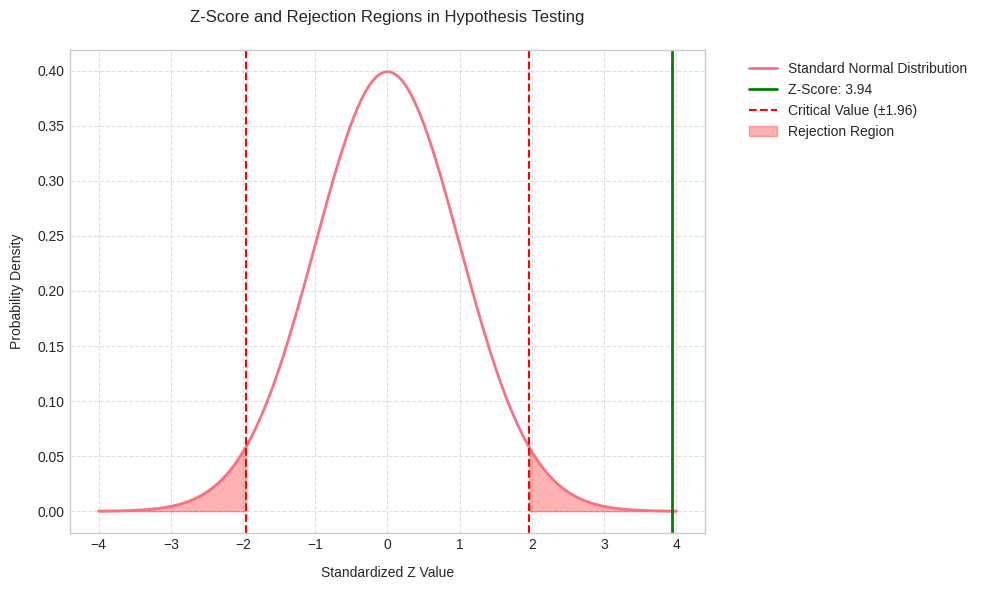

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate data for standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Calculate z-score (example value - replace with your actual calculation)
sample_mean = 173.96  # Example sample mean
population_mean = 172  # Hypothesized population mean
sample_std = 4.98      # Sample standard deviation
n = 100                # Sample size
z_skoru = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", linewidth=2)

# Add vertical lines
plt.axvline(z_skoru, color='green', linestyle='-', 
            label=f'Z-Score: {z_skoru:.2f}', linewidth=2)
plt.axvline(norm.ppf(0.975), color='red', linestyle='--', 
           label="Critical Value (±1.96)", linewidth=1.5)
plt.axvline(-norm.ppf(0.975), color='red', linestyle='--', linewidth=1.5)

# Shade the rejection regions
plt.fill_between(x, y, where=(x >= norm.ppf(0.975)), 
                color='red', alpha=0.3, label='Rejection Region')
plt.fill_between(x, y, where=(x <= -norm.ppf(0.975)), 
                color='red', alpha=0.3)

# Add title and labels with improved formatting
plt.title("Z-Score and Rejection Regions in Hypothesis Testing", pad=20)
plt.xlabel("Standardized Z Value", labelpad=10)
plt.ylabel("Probability Density", labelpad=10)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.show()


📌 Bu grafikte:
- Yeşil çizgi → hesapladığın z-skoru
- Kırmızı alan → red bölgesi
- Eğer yeşil çizgi kırmızının içindeyse → H₀ reddedilir

## 📐 Tip I ve Tip II Hatalar: Yanılma Payımız

| Karar | H₀ doğru | H₀ yanlış |
|--------|------------|--------------|
| **Reddedildi** | ❌ Tip I Hata | ✅ Güçlü karar |
| **Kabul Edildi** | ✅ Doğru kabul | ❌ Tip II Hata |

📌 Alfa (α): Tip I hatası → genellikle `0.05` alınır  
Beta (β): Tip II hatası → `power = 1 - β` olarak ifade edilir

## 📊 Hipotez Türleri ve Modelleme Bağlantısı

| Alan | H₀ | H₁ |
|------|----|-----|
| **Ürün Analizi** | Yeni tasarım etkisizdir | Daha fazla kullanıcı etkileşimine yol açar |
| **Finans** | Hisse sabittir | Hisse yükseldi |
| **E-ticaret** | Dönüşüm oranı aynı | Dönüşüm oranı arttı |
| **Veri Bilimi** | Özellik etkisiz | Özellik modeli geliştirir |

📌 Model kurarken her özellik için H₀ test edilir.  
Eğer reddedilirse → o özellik modelde kalır.